In [2]:
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
import time
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
sns.set()

In [3]:
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from PIL import Image

In [3]:
# Define paths to your image folders
train_folder = r"H:\Thesis\Thesis work Version 7\Dataset_V_7_Thesis\train"
valid_folder = r"H:\Thesis\Thesis work Version 7\Dataset_V_7_Thesis\val"
test_folder = r"H:\Thesis\Thesis work Version 7\Dataset_V_7_Thesis\test"

In [4]:
# Function to load RGB images from a folder with labels inferred from subdirectories
def load_images(folder):
    images = []
    targets = []
    class_folders = os.listdir(folder)
    for class_folder in class_folders:
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory entries
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if not os.path.isfile(img_path):
                continue  # Skip non-file entries
            img = Image.open(img_path).convert('RGB')  # Keep RGB format
            img = img.resize((256, 256))
            img_array = np.array(img)
            images.append(img_array)

            # Extract target label from parent folder name (class name)
            target = class_folder
            targets.append(target)
    return np.array(images), np.array(targets)


In [5]:
# Load training, validation, and test data
input_train, target_train = load_images(train_folder)
input_valid, target_valid = load_images(valid_folder)
input_test, target_test = load_images(test_folder)

In [6]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], 256, 256, 3)  # Use 3 channels
input_valid = input_valid.reshape(input_valid.shape[0], 256, 256, 3)  # Use 3 channels
input_test = input_test.reshape(input_test.shape[0], 256, 256, 3)  # Use 3 channels
input_shape = (256, 256, 3)  # Adjust input shape for RGB images

In [7]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_valid = input_valid.astype('float32')
input_test = input_test.astype('float32')

In [8]:
# Convert into [0, 1] range
input_train = input_train / 255
input_valid = input_valid / 255
input_test = input_test / 255

In [9]:
# Create a dictionary to map string labels to numeric values
label_to_index = {label: index for index, label in enumerate(np.unique(target_train))}

In [11]:
# Print the label-to-index mapping
print("Label to Index Mapping:")
for label, index in label_to_index.items():
    print(f"Label: {label} -> Index: {index}")

Label to Index Mapping:
Label: Apple___Apple_scab -> Index: 0
Label: Apple___Black_rot -> Index: 1
Label: Apple___Cedar_apple_rust -> Index: 2
Label: Apple___healthy -> Index: 3
Label: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot -> Index: 4
Label: Corn_(maize)___Common_rust_ -> Index: 5
Label: Corn_(maize)___Northern_Leaf_Blight -> Index: 6
Label: Corn_(maize)___healthy -> Index: 7
Label: Grape___Black_rot -> Index: 8
Label: Grape___Esca_(Black_Measles) -> Index: 9
Label: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) -> Index: 10
Label: Grape___healthy -> Index: 11
Label: Tomato___Bacterial_spot -> Index: 12
Label: Tomato___Early_blight -> Index: 13
Label: Tomato___Late_blight -> Index: 14
Label: Tomato___healthy -> Index: 15


In [12]:
# Convert string labels to numeric values using label_to_index mapping
target_train_indices = np.array([label_to_index[label] for label in target_train])
target_test_indices = np.array([label_to_index[label] for label in target_test])
target_valid_indices = np.array([label_to_index[label] for label in target_valid])

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
# Convert numeric labels to categorical targets
target_train_categorical = to_categorical(target_train_indices, num_classes=16)
target_valid_categorical = to_categorical(target_valid_indices, num_classes=16)
target_test_categorical = to_categorical(target_test_indices, num_classes=16)

In [15]:
# Print the shape of data and targets after preprocessing
print("Input shape (train):", input_train.shape)
print("Input shape (validation):", input_valid.shape)
print("Input shape (test):", input_test.shape)
print("Target shape (train):", target_train_categorical.shape)
print("Target shape (validation):", target_valid_categorical.shape)
print("Target shape (test):", target_test_categorical.shape)

Input shape (train): (22488, 256, 256, 3)
Input shape (validation): (6425, 256, 256, 3)
Input shape (test): (3214, 256, 256, 3)
Target shape (train): (22488, 16)
Target shape (validation): (6425, 16)
Target shape (test): (3214, 16)


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(16, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       1

In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Data augmentation setup
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(input_train, target_train_categorical, batch_size=32)
valid_generator = valid_datagen.flow(input_valid, target_valid_categorical, batch_size=32)


In [20]:
# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=len(input_train) // 32,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(input_valid) // 32
)


Epoch 1/10
702/702 [==============================] - 3705s 5s/step - loss: 1.3986 - accuracy: 0.5232 - val_loss: 0.7535 - val_accuracy: 0.7344
Epoch 2/10
702/702 [==============================] - 3942s 6s/step - loss: 0.6914 - accuracy: 0.7542 - val_loss: 0.4234 - val_accuracy: 0.8575
Epoch 3/10
702/702 [==============================] - 4025s 6s/step - loss: 0.4570 - accuracy: 0.8395 - val_loss: 0.2668 - val_accuracy: 0.9048
Epoch 4/10
702/702 [==============================] - 4330s 6s/step - loss: 0.3326 - accuracy: 0.8856 - val_loss: 0.4097 - val_accuracy: 0.8650
Epoch 5/10
702/702 [==============================] - 5002s 7s/step - loss: 0.2761 - accuracy: 0.9036 - val_loss: 0.2621 - val_accuracy: 0.9073
Epoch 6/10
702/702 [==============================] - 4180s 6s/step - loss: 0.2450 - accuracy: 0.9159 - val_loss: 0.1803 - val_accuracy: 0.9461
Epoch 7/10
702/702 [==============================] - 4127s 6s/step - loss: 0.2141 - accuracy: 0.9263 - val_loss: 0.1761 - val_accuracy:

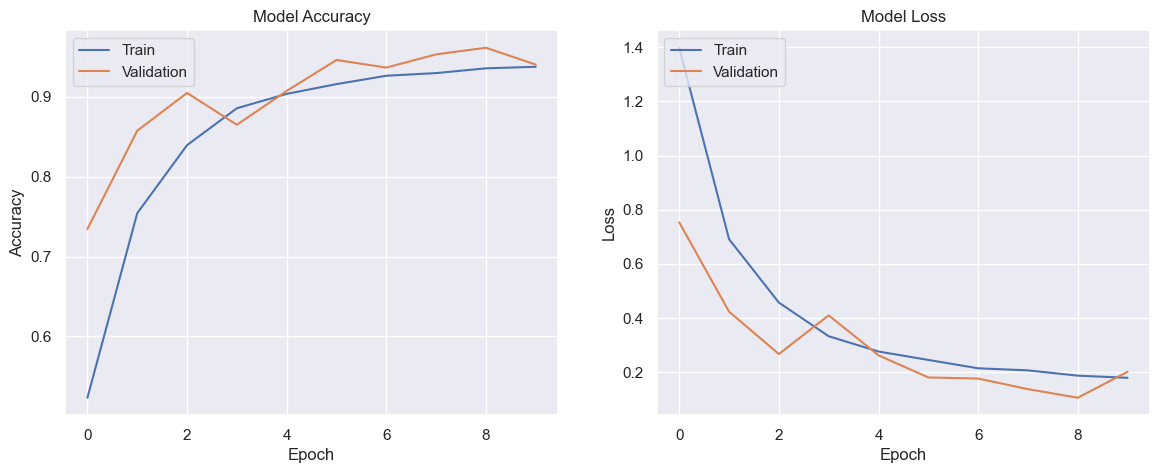

In [21]:
import matplotlib.pyplot as plt

# Function to plot training & validation accuracy and loss
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(14, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Call the function to plot the training history
plot_training_history(history)


In [22]:
from sklearn.metrics import classification_report

# Make predictions on test data
predictions = model.predict(input_test)

# Convert predictions from one-hot encoded format to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded format to class labels
true_classes = np.argmax(target_test_categorical, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       200
           1       0.99      0.97      0.98       200
           2       0.99      0.97      0.98       200
           3       0.98      0.88      0.92       200
           4       0.85      0.90      0.87       200
           5       1.00      0.98      0.99       200
           6       0.91      0.86      0.88       200
           7       0.99      0.98      0.99       200
           8       0.96      0.95      0.96       200
           9       0.96      0.98      0.97       200
          10       0.94      0.99      0.97       200
          11       0.98      0.97      0.98       200
          12       0.92      0.92      0.92       214
          13       0.70      0.97      0.81       200
          14       0.97      0.71      0.82       200
          15       1.00      0.91      0.95       200

    accuracy                           0.93      3214
   

In [23]:
# Continue training for an additional 10 epochs
history_additional = model.fit(
    train_generator,
    steps_per_epoch=len(input_train) // 32,
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(input_valid) // 32
)

# If you want to combine the history of the initial training and the additional training
def combine_histories(history1, history2):
    for key in history1.history.keys():
        history1.history[key].extend(history2.history[key])
    return history1

# Combine the histories
history_combined = combine_histories(history, history_additional)

Epoch 1/10
702/702 [==============================] - 3843s 5s/step - loss: 0.1819 - accuracy: 0.9370 - val_loss: 0.1176 - val_accuracy: 0.9573
Epoch 2/10
702/702 [==============================] - 4845s 7s/step - loss: 0.1626 - accuracy: 0.9439 - val_loss: 0.0976 - val_accuracy: 0.9664
Epoch 3/10
702/702 [==============================] - 3996s 6s/step - loss: 0.1526 - accuracy: 0.9473 - val_loss: 0.0957 - val_accuracy: 0.9663
Epoch 4/10
702/702 [==============================] - 4100s 6s/step - loss: 0.1462 - accuracy: 0.9507 - val_loss: 0.1260 - val_accuracy: 0.9552
Epoch 5/10
702/702 [==============================] - 4364s 6s/step - loss: 0.1402 - accuracy: 0.9522 - val_loss: 0.0812 - val_accuracy: 0.9730
Epoch 6/10
702/702 [==============================] - 4588s 7s/step - loss: 0.1359 - accuracy: 0.9536 - val_loss: 0.1331 - val_accuracy: 0.9567
Epoch 7/10
702/702 [==============================] - 4809s 7s/step - loss: 0.1271 - accuracy: 0.9568 - val_loss: 0.0963 - val_accuracy:

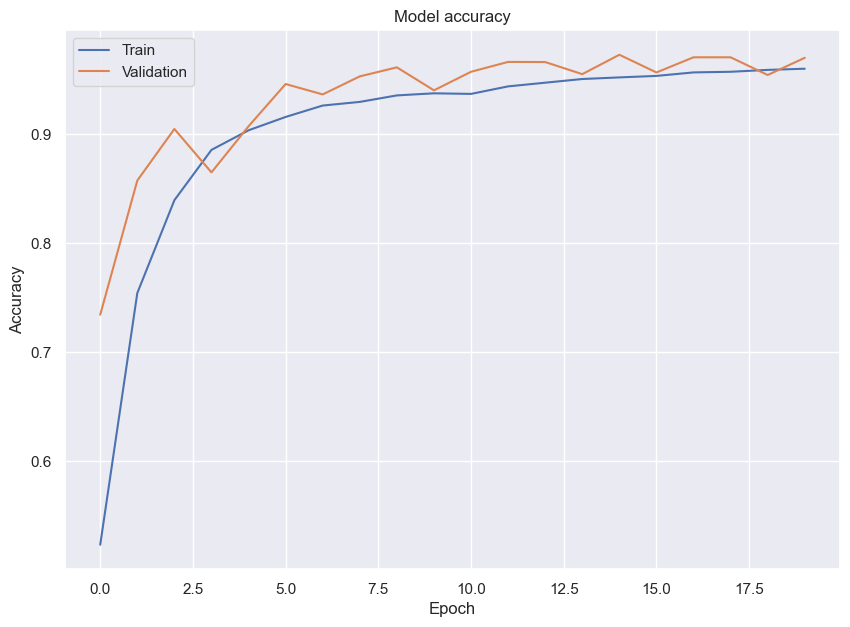

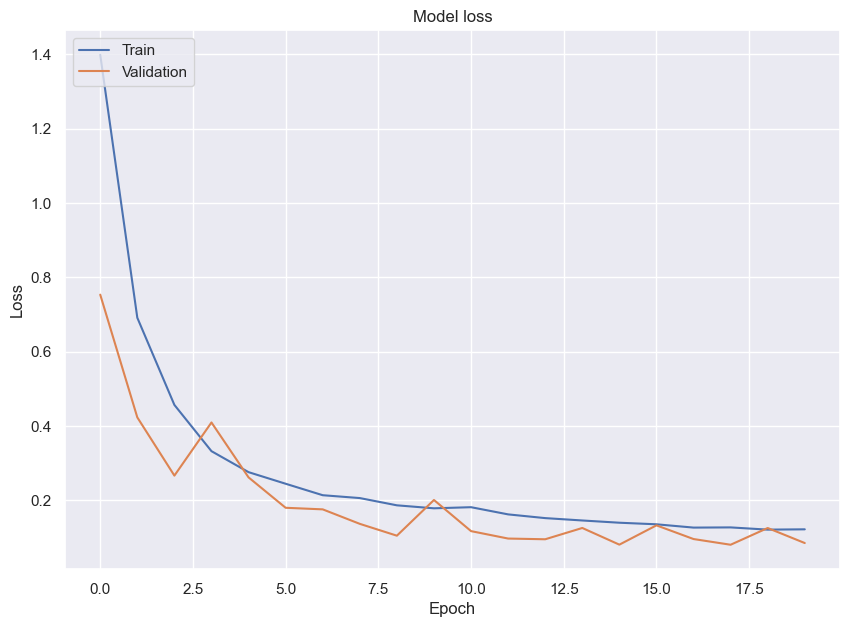

In [24]:
# Plot training & validation accuracy values
plt.plot(history_combined.history['accuracy'])
plt.plot(history_combined.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_combined.history['loss'])
plt.plot(history_combined.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [25]:
from sklearn.metrics import classification_report

# Make predictions on test data
predictions = model.predict(input_test)

# Convert predictions from one-hot encoded format to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded format to class labels
true_classes = np.argmax(target_test_categorical, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       200
           1       0.99      0.96      0.98       200
           2       0.99      1.00      0.99       200
           3       0.90      1.00      0.95       200
           4       0.89      0.97      0.93       200
           5       0.99      0.99      0.99       200
           6       0.97      0.88      0.92       200
           7       1.00      0.98      0.99       200
           8       1.00      0.96      0.98       200
           9       0.99      0.99      0.99       200
          10       0.97      1.00      0.98       200
          11       0.99      0.98      0.99       200
          12       1.00      0.98      0.99       214
          13       0.99      0.89      0.94       200
          14       0.89      0.97      0.93       200
          15       0.99      0.99      0.99       200

    accuracy                           0.97      3214
   

In [27]:
save_path = r"H:\Thesis\Thesis work Version 7\Result_V_7\model_final_Simulation_Thesis_4800(Fahim & Zia).h5"

# Save the model
model.save(save_path)

print(f"Model saved to {save_path}")

Model saved to H:\Thesis\Thesis work Version 7\Result_V_7\model_final_Simulation_Thesis_4800(Fahim & Zia).h5


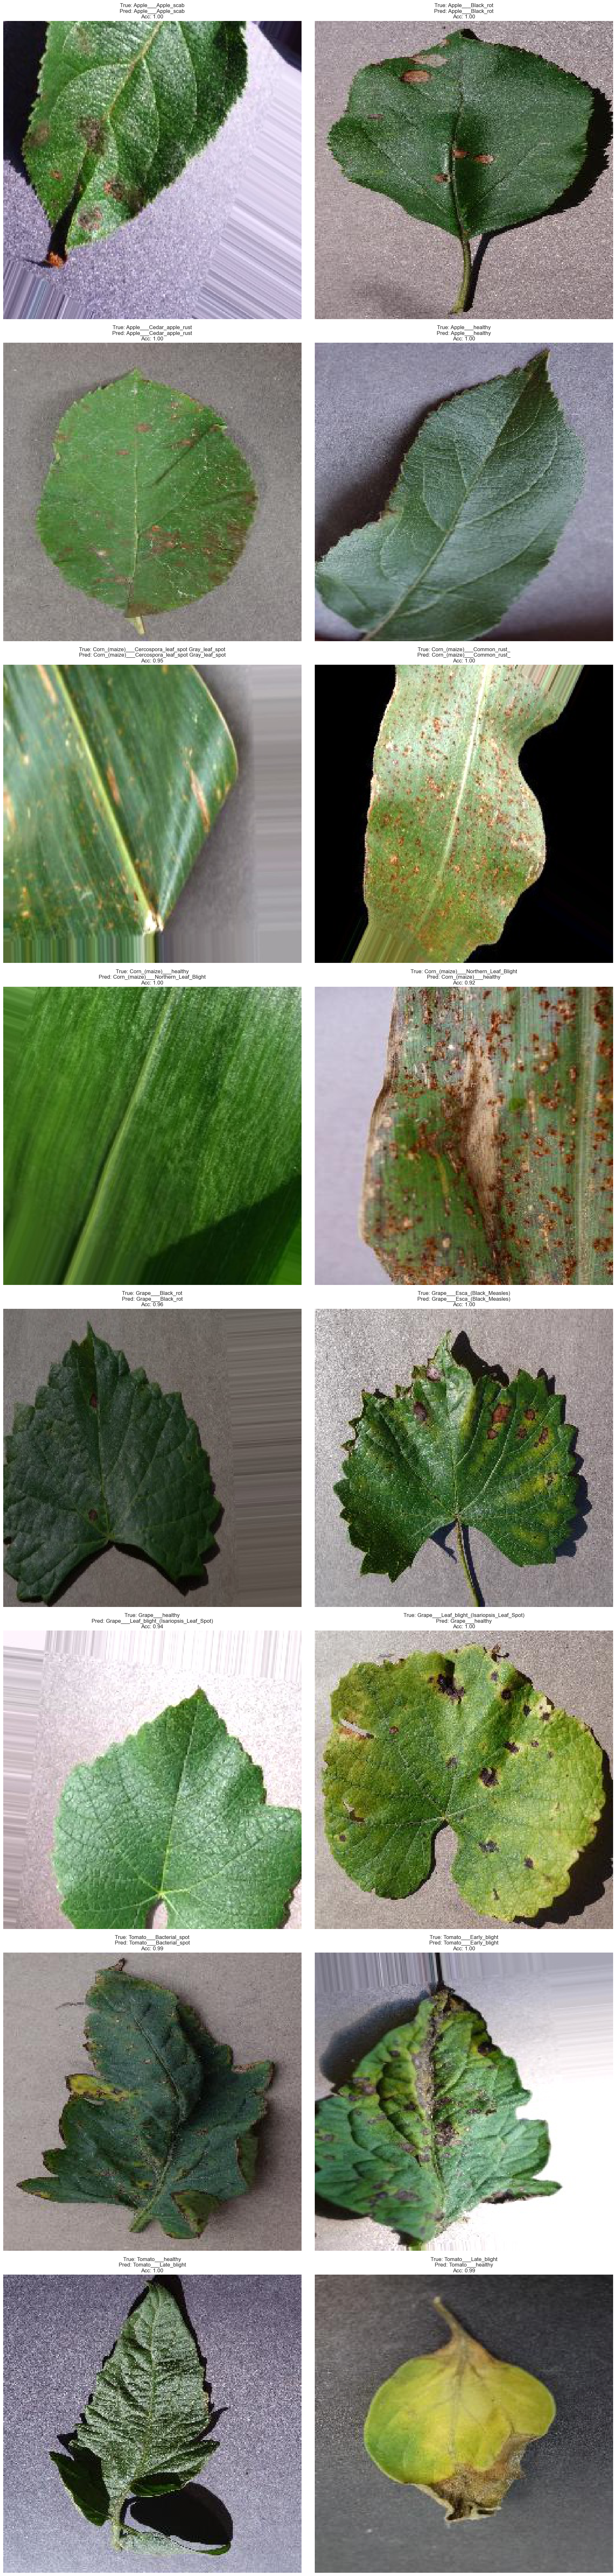

In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import load_model

# Define the path to the test directory
test_dir = r"H:\Thesis\Thesis work Version 7\Dataset_V_7_Thesis\test"

# Load your model (update the model path as needed)
model_path = r"H:\Thesis\Thesis work Version 7\Result_V_7\model_final_Simulation_Thesis_4800(Fahim & Zia).h5"
model = load_model(model_path)

# Define the classes
classes = os.listdir(test_dir)

# Create a dictionary to store the paths of images for each class
class_image_paths = {cls: [] for cls in classes}

# Populate the dictionary with image paths
for cls in classes:
    class_dir = os.path.join(test_dir, cls)
    class_images = os.listdir(class_dir)
    class_image_paths[cls] = [os.path.join(class_dir, img) for img in class_images]

# Take at least one random image from each class
random_images = []
for cls in classes:
    random_images.append(random.choice(class_image_paths[cls]))

# Create subplots in a grid of 2 columns and enough rows for all classes
num_classes = len(classes)
fig, axs = plt.subplots((num_classes + 1) // 2, 2, figsize=(20, num_classes * 5))

# Iterate over the subplots
for i, ax in enumerate(axs.flat):
    if i < num_classes:
        # Load the image
        image_path = random_images[i]
        image = keras_image.load_img(image_path, target_size=(256, 256))
        # Preprocess the image
        image_array = keras_image.img_to_array(image)
        image_array = image_array / 255.0
        image_array = image_array.reshape((1, 256, 256, 3))  # Add batch dimension

        # Get the true class name
        true_class = os.path.basename(os.path.dirname(image_path))

        # Use the model to predict class probabilities for the image
        predictions = model.predict(image_array)
        # Determine the predicted class label based on the highest probability
        predicted_class_index = np.argmax(predictions)
        predicted_class_name = classes[predicted_class_index]  # Get the class name based on the index
        # Get the predicted class probability
        predicted_probability = predictions[0][predicted_class_index]

        # Plot the image with its corresponding class name and prediction accuracy
        ax.imshow(image)
        ax.set_title(f"True: {true_class}\nPred: {predicted_class_name}\nAcc: {predicted_probability:.2f}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide unused subplots

plt.tight_layout()
plt.show()


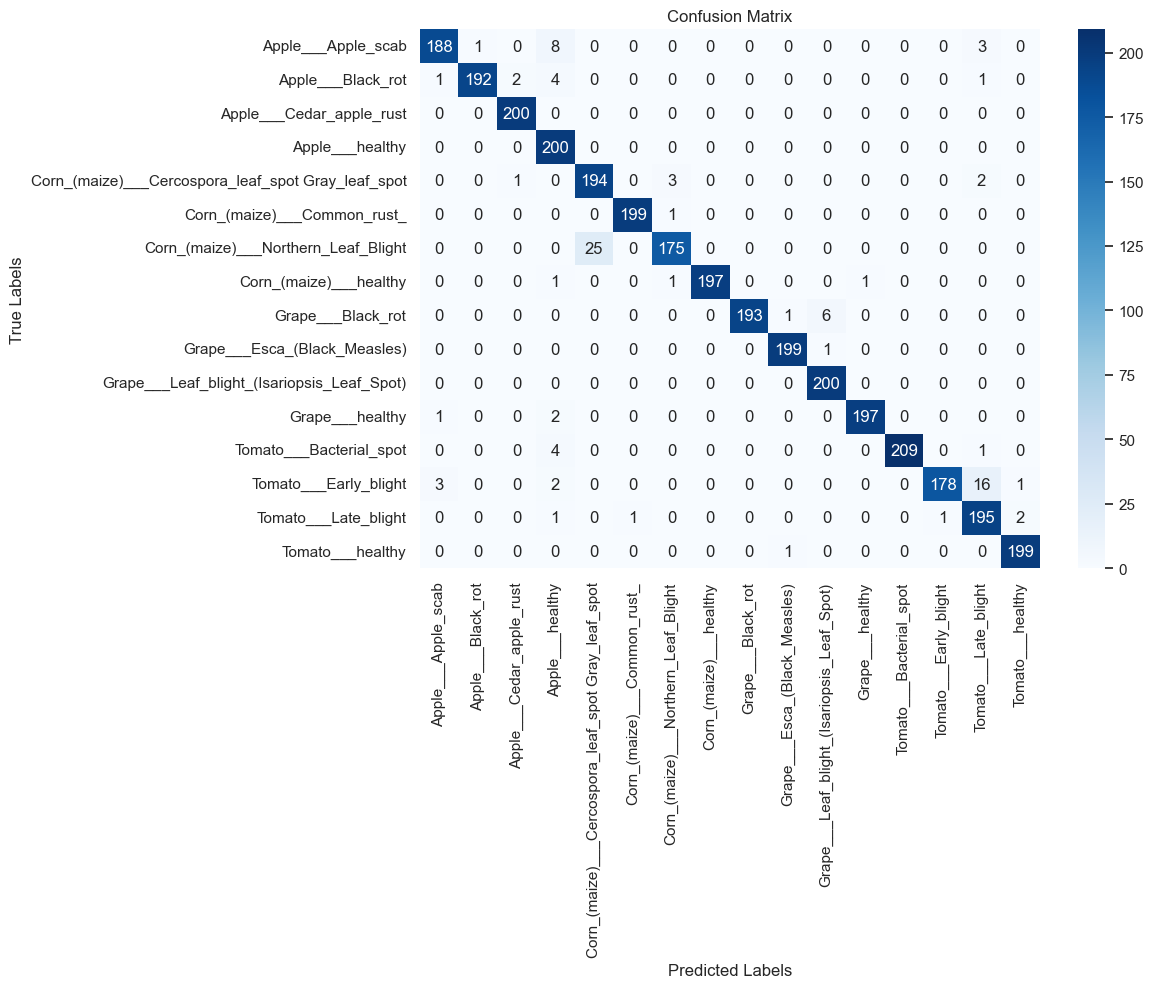

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the classes
classes = ['Apple___Apple_scab', 
           'Apple___Black_rot', 
           'Apple___Cedar_apple_rust',
           'Apple___healthy',
           'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
           'Corn_(maize)___Common_rust_',
           'Corn_(maize)___Northern_Leaf_Blight',
           'Corn_(maize)___healthy',
           'Grape___Black_rot',
           'Grape___Esca_(Black_Measles)',
           'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
           'Grape___healthy',
           'Tomato___Bacterial_spot',
           'Tomato___Early_blight',
           'Tomato___Late_blight',
           'Tomato___healthy']  # Replace with your class names

# Get the true class labels for the test set
true_labels = [label_to_index[label] for label in target_test]

# Get the predicted class labels for the test set
predicted_labels = [np.argmax(prediction) for prediction in model.predict(input_test)]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Found 3214 images belonging to 16 classes.


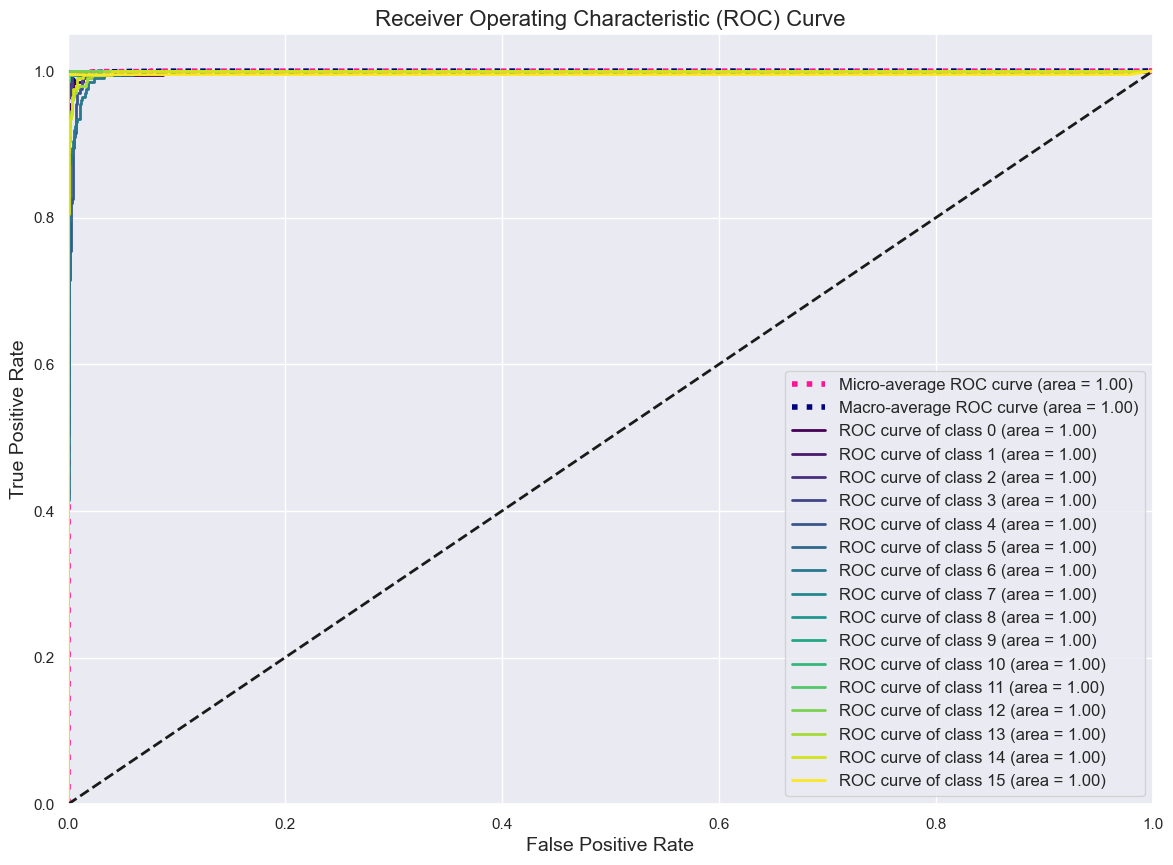

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

# Load the saved model
model = load_model(r"H:\Thesis\Thesis work Version 7\Result_V_7\model_final_Simulation_Thesis_4800(Fahim & Zia).h5")

# Define the path to the test data directory
test_data_dir = r"H:\Thesis\Thesis work Version 7\Dataset_V_7_Thesis\test"

# Define image dimensions
img_width, img_height = 256, 256

# Initialize the test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load the test data from the directory
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Make predictions on test data
y_pred = model.predict(test_generator)

# Extract true labels from the generator
true_labels = test_generator.classes

# Initialize the label binarizer and fit it to the true labels
lb = LabelBinarizer()
true_labels = lb.fit_transform(true_labels)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(true_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(true_labels.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(lb.classes_))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(lb.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(lb.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves
plt.figure(figsize=(14, 10))
plt.plot(fpr["micro"], tpr["micro"], label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"], label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]), color='navy', linestyle=':', linewidth=4)

colors = plt.cm.viridis(np.linspace(0, 1, len(lb.classes_)))
for i, color in zip(range(len(lb.classes_)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(lb.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


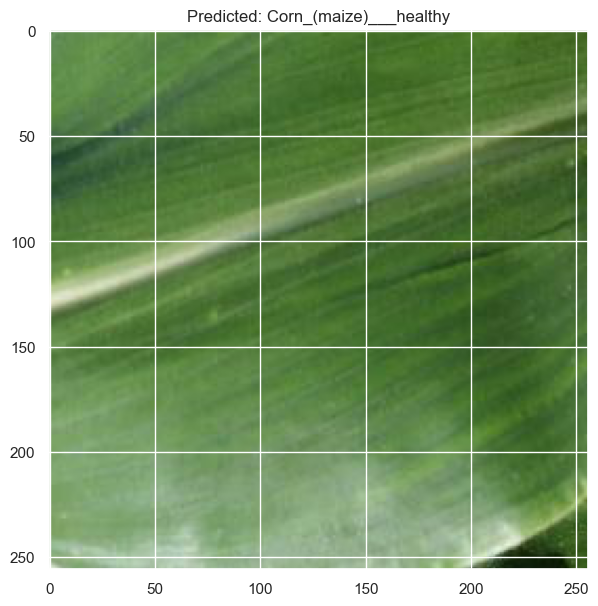

Predicted class: Corn_(maize)___healthy with probability: 0.9999926090240479


In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"H:\Thesis\Thesis work Version 7\Result_V_7\model_final_Simulation_Thesis_4800(Fahim & Zia).h5"
image_path = r"H:\Thesis\Thesis work Version 7\corn healty.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')


In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_7_Thesis\val\Tomato___Late_blight\0c47de5b-adbe-479f-8ccf-5b8c530c32f8___RS_Late.B 6312.JPG"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')


OSError: SavedModel file does not exist at: C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5/{saved_model.pbtxt|saved_model.pb}

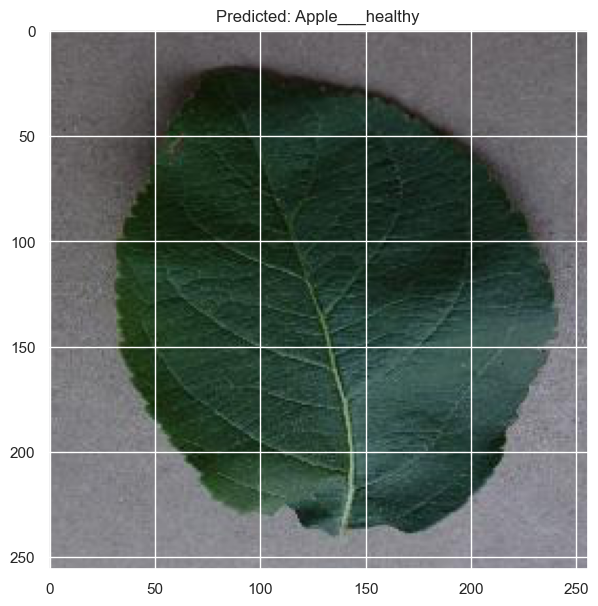

Predicted class: Apple___healthy with probability: 0.9999831914901733


In [34]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_7_Thesis\val\Apple___healthy\0872ffc6-d9db-4ba7-a2bf-1fb0f537cafb___RS_HL 6129.JPG"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

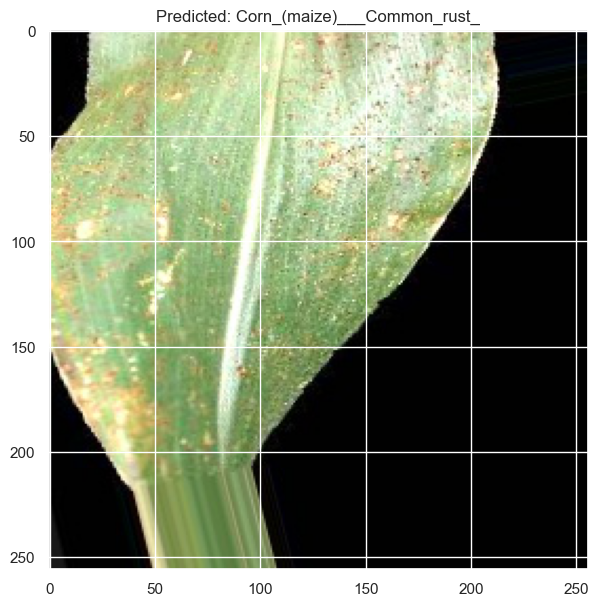

Predicted class: Corn_(maize)___Common_rust_ with probability: 1.0


In [35]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_7_Thesis\val\Corn_(maize)___Common_rust_\augmented_1280.JPG"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

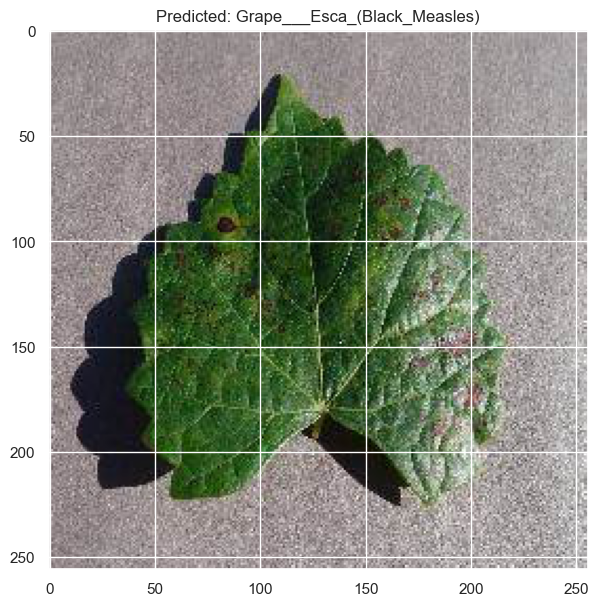

Predicted class: Grape___Esca_(Black_Measles) with probability: 0.9986691474914551


In [38]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\Grape___Esca.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

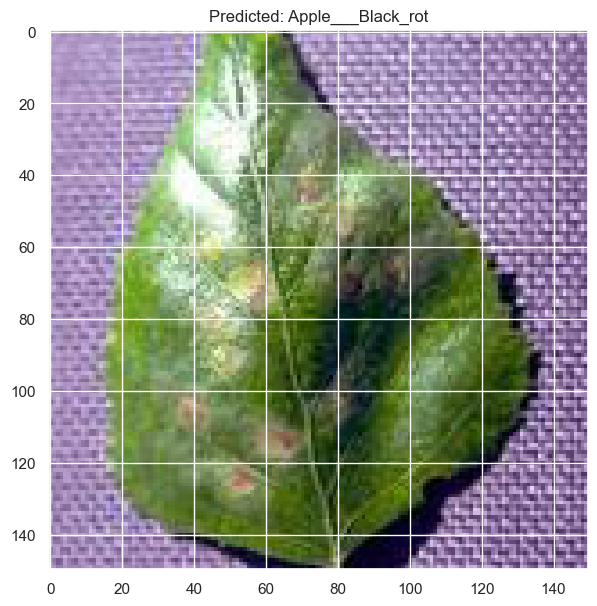

Predicted class: Apple___Black_rot with probability: 0.7259551286697388


In [43]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\appale blac rot.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

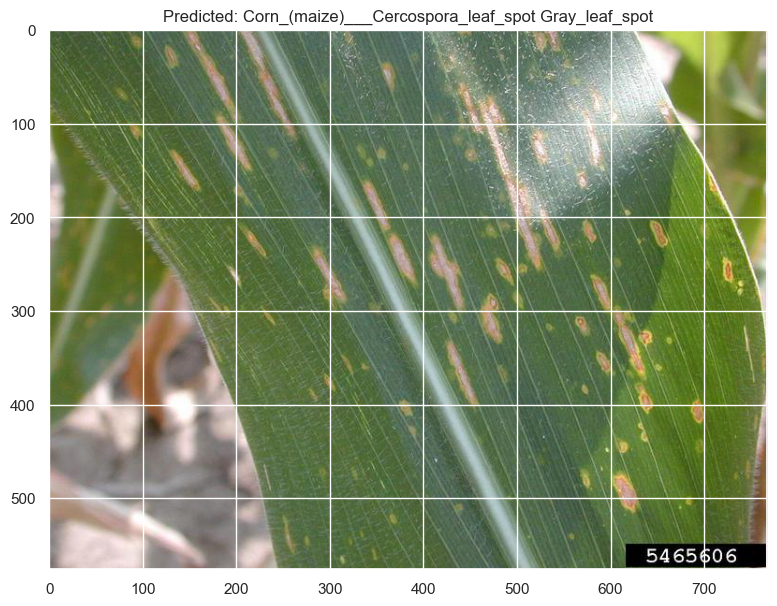

Predicted class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot with probability: 1.0


In [50]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\5465606.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\lateblightTom_lesion3.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

OSError: SavedModel file does not exist at: C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5/{saved_model.pbtxt|saved_model.pb}

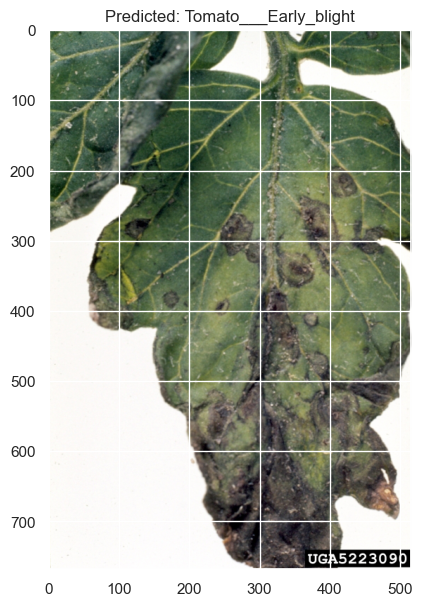

Predicted class: Tomato___Early_blight with probability: 0.8850281238555908


In [60]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\5223090.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

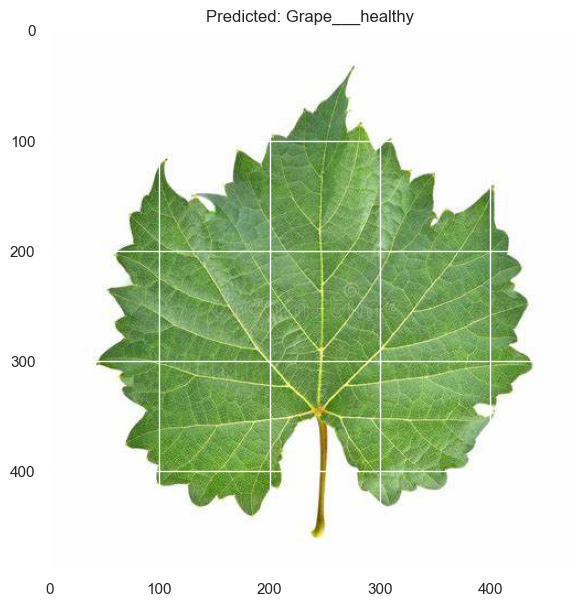

Predicted class: Grape___healthy with probability: 0.9465029835700989


In [61]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\OIP (3).jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

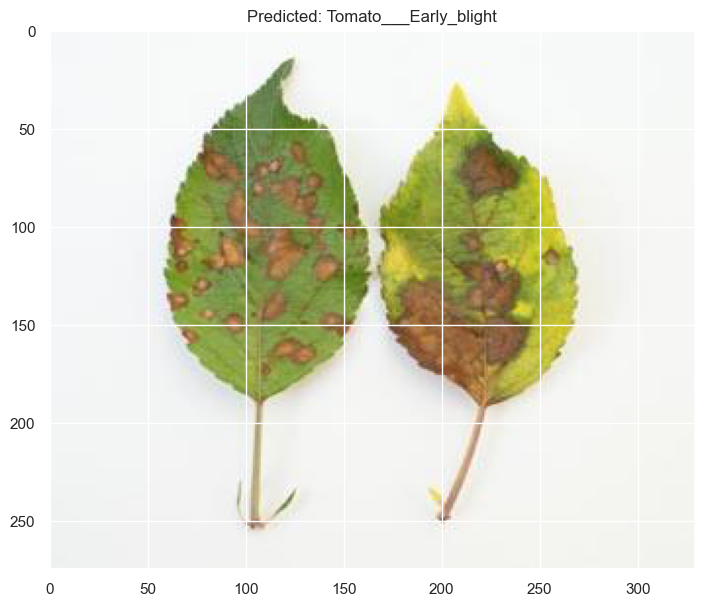

Predicted class: Tomato___Early_blight with probability: 0.5079742670059204


In [77]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\816.jpg"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')

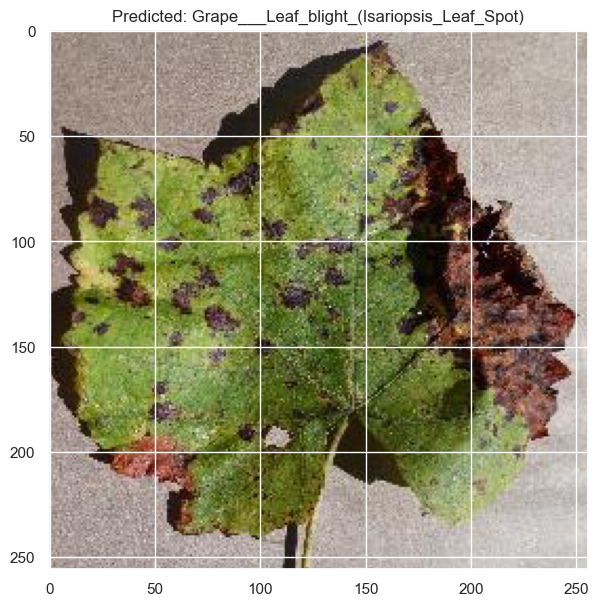

Predicted class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) with probability: 1.0


In [82]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to the model file and the test image
model_path = r"C:\Users\HP\OneDrive\Desktop\Result_V_7\Thesis_Demo_Simulation_6(With 16 Class) Best Result.h5"
image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_7\Grape___Leaf_blight_(Isariopsis_Leaf_Spot)\8436510b-4989-4f31-bd77-0e4583db26c3___FAM_L.Blight 1685.JPG"
# Load the trained model
model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Preprocess the test image
img_array = preprocess_image(image_path)

# Make predictions
predictions = model.predict(img_array)

# Assuming you have a list of class names
class_names = ['Apple___Apple_scab',
'Apple___Black_rot',
'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Corn_(maize)___Common_rust_' ,
'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy' ,
 'Grape___Black_rot' ,
'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight' ,
 'Tomato___Late_blight' ,
 'Tomato___healthy']  # Replace with your actual class names

# Get the index of the highest probability class
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_index]

# Display the image and prediction result
img = image.load_img(image_path)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.show()

print(f'Predicted class: {predicted_class} with probability: {predictions[0][predicted_class_index]}')